In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Explicit dataset path
DATASET_PATH = "customer_support_tickets (2).csv"

data = pd.read_csv(DATASET_PATH)

print("Dataset Loaded From:", DATASET_PATH)
print("Shape:", data.shape)
data.head()


Dataset Loaded From: customer_support_tickets (2).csv
Shape: (8469, 17)


,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


In [2]:
# Keep only rows with satisfaction rating
data = data[data['Customer Satisfaction Rating'].notna()].copy()

# Convert datetime columns
data['First Response Time'] = pd.to_datetime(
    data['First Response Time'], errors='coerce'
)

data['Time to Resolution'] = pd.to_datetime(
    data['Time to Resolution'], errors='coerce'
)

# Resolution time in hours
data['Resolution_Hours'] = (
    data['Time to Resolution'] - data['First Response Time']
).dt.total_seconds() / 3600

data['Resolution_Hours'] = data['Resolution_Hours'].fillna(
    data['Resolution_Hours'].median()
)


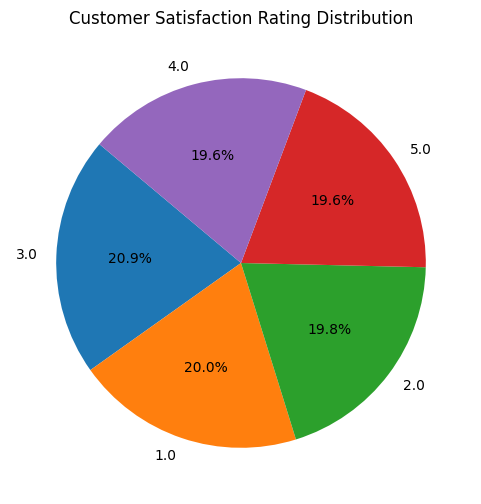

In [3]:
rating_counts = data['Customer Satisfaction Rating'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(
    rating_counts,
    labels=rating_counts.index,
    autopct='%1.1f%%',
    startangle=140
)
plt.title("Customer Satisfaction Rating Distribution")
plt.show()


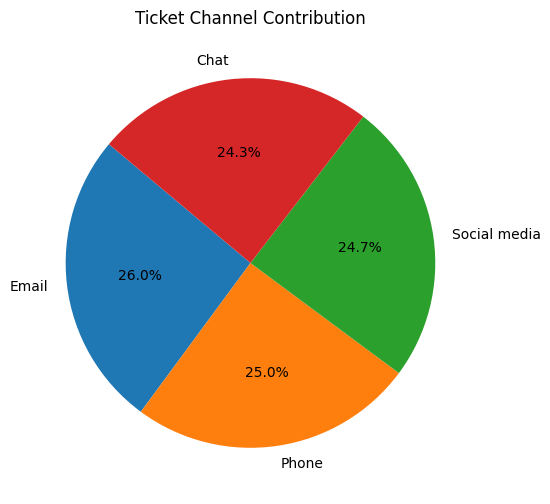

In [5]:
channel_counts = data['Ticket Channel'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(
    channel_counts,
    labels=channel_counts.index,
    autopct='%1.1f%%',
    startangle=140
)
plt.title("Ticket Channel Contribution")
plt.show()


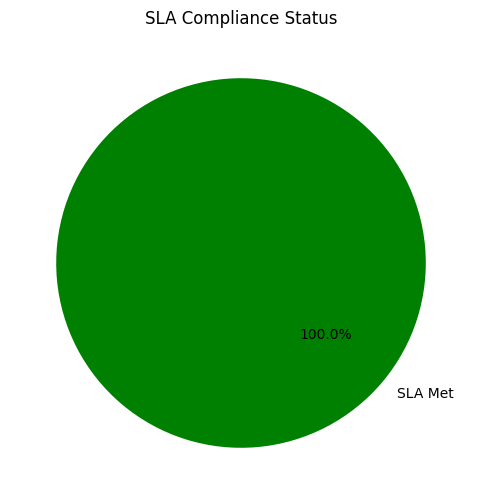

In [6]:
data['SLA_Status'] = data['Resolution_Hours'].apply(
    lambda x: 'SLA Met' if x <= 24 else 'SLA Breached'
)

sla_counts = data['SLA_Status'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(
    sla_counts,
    labels=sla_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=['green', 'red']
)
plt.title("SLA Compliance Status")
plt.show()


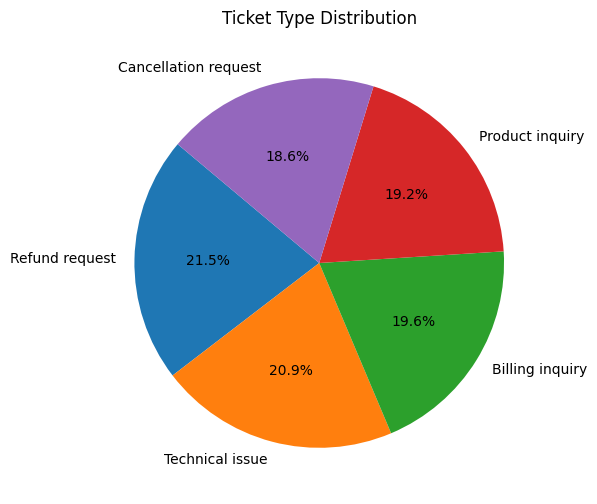

In [7]:
type_counts = data['Ticket Type'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(
    type_counts,
    labels=type_counts.index,
    autopct='%1.1f%%',
    startangle=140
)
plt.title("Ticket Type Distribution")
plt.show()


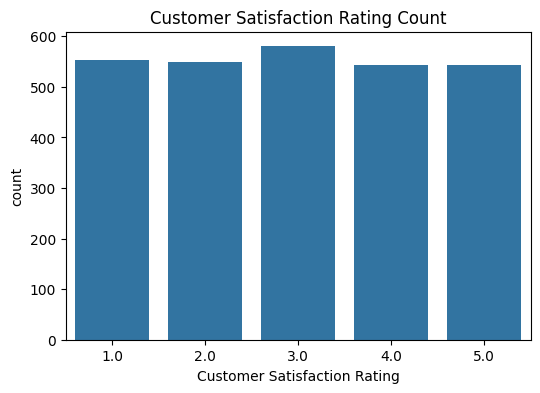

In [8]:
plt.figure(figsize=(6,4))
sns.countplot(x='Customer Satisfaction Rating', data=data)
plt.title("Customer Satisfaction Rating Count")
plt.show()


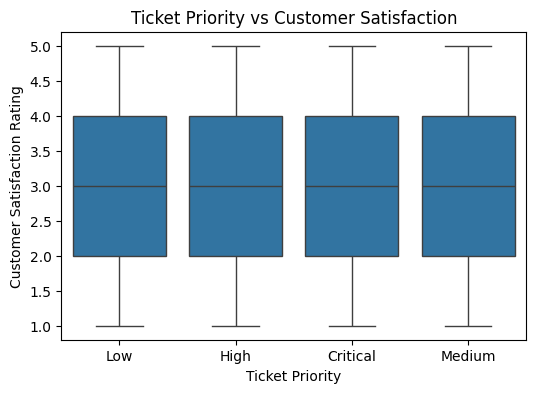

In [9]:
plt.figure(figsize=(6,4))
sns.boxplot(
    x='Ticket Priority',
    y='Customer Satisfaction Rating',
    data=data
)
plt.title("Ticket Priority vs Customer Satisfaction")
plt.show()


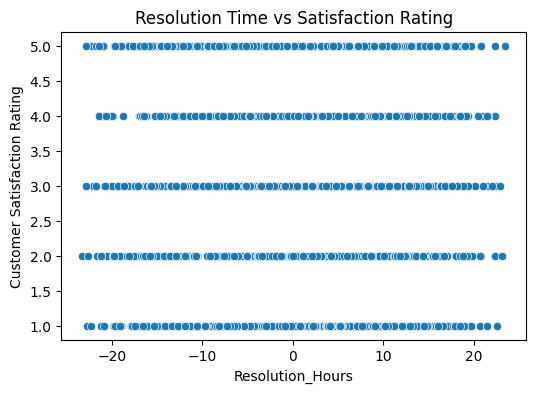

In [10]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    x='Resolution_Hours',
    y='Customer Satisfaction Rating',
    data=data
)
plt.title("Resolution Time vs Satisfaction Rating")
plt.show()


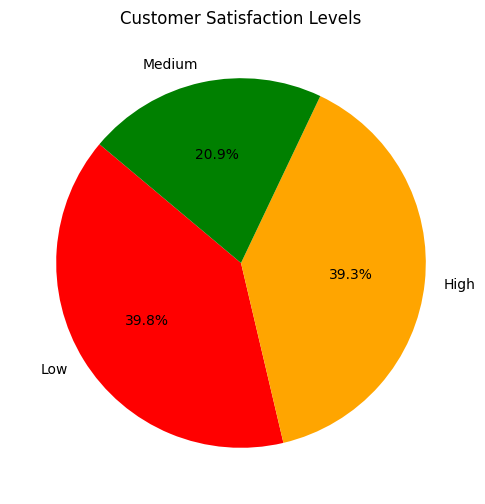

In [11]:
def satisfaction_level(rating):
    if rating <= 2:
        return 'Low'
    elif rating == 3:
        return 'Medium'
    else:
        return 'High'

data['Satisfaction_Level'] = data['Customer Satisfaction Rating'].apply(satisfaction_level)

level_counts = data['Satisfaction_Level'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(
    level_counts,
    labels=level_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=['red', 'orange', 'green']
)
plt.title("Customer Satisfaction Levels")
plt.show()


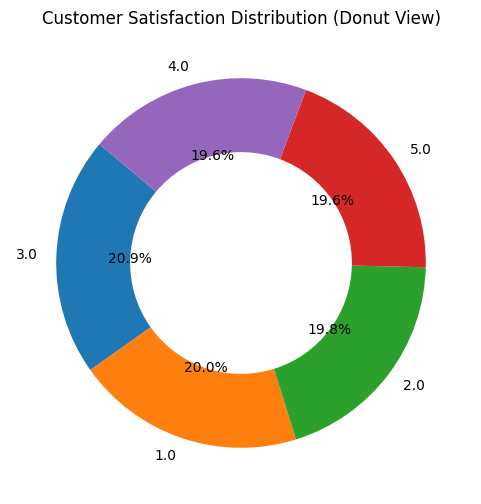

In [12]:
rating_counts = data['Customer Satisfaction Rating'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(
    rating_counts,
    labels=rating_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops=dict(width=0.4)
)
plt.title("Customer Satisfaction Distribution (Donut View)")
plt.show()


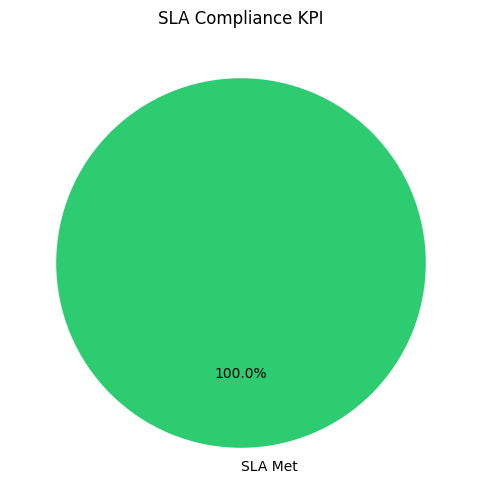

In [13]:
sla_counts = data['SLA_Status'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(
    sla_counts,
    labels=sla_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#2ecc71', '#e74c3c']
)
plt.title("SLA Compliance KPI")
plt.show()


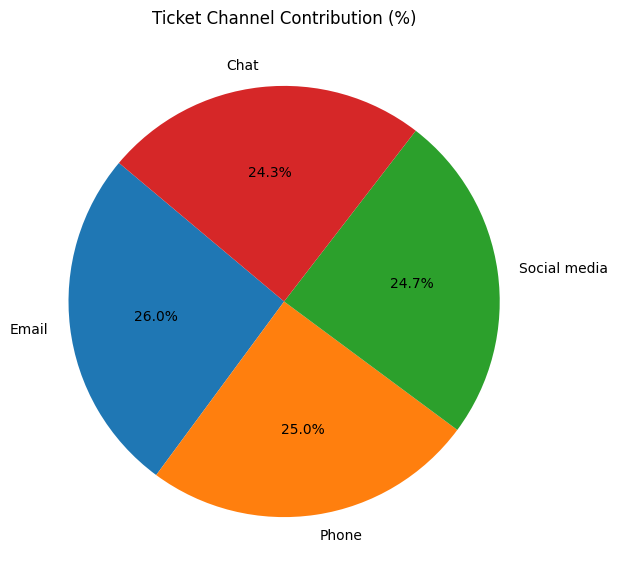

In [14]:
channel_counts = data['Ticket Channel'].value_counts()

plt.figure(figsize=(7,7))
plt.pie(
    channel_counts,
    labels=channel_counts.index,
    autopct=lambda p: f'{p:.1f}%',
    startangle=140
)
plt.title("Ticket Channel Contribution (%)")
plt.show()


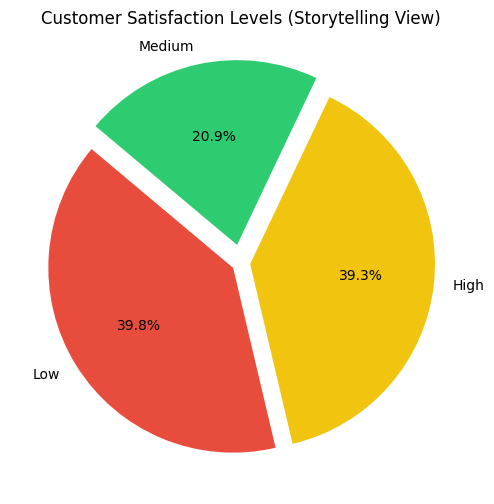

In [15]:
level_counts = data['Satisfaction_Level'].value_counts()

explode = (0.05, 0.05, 0.1)  # highlight High satisfaction

plt.figure(figsize=(6,6))
plt.pie(
    level_counts,
    labels=level_counts.index,
    autopct='%1.1f%%',
    explode=explode,
    startangle=140,
    colors=['#e74c3c', '#f1c40f', '#2ecc71']
)
plt.title("Customer Satisfaction Levels (Storytelling View)")
plt.show()


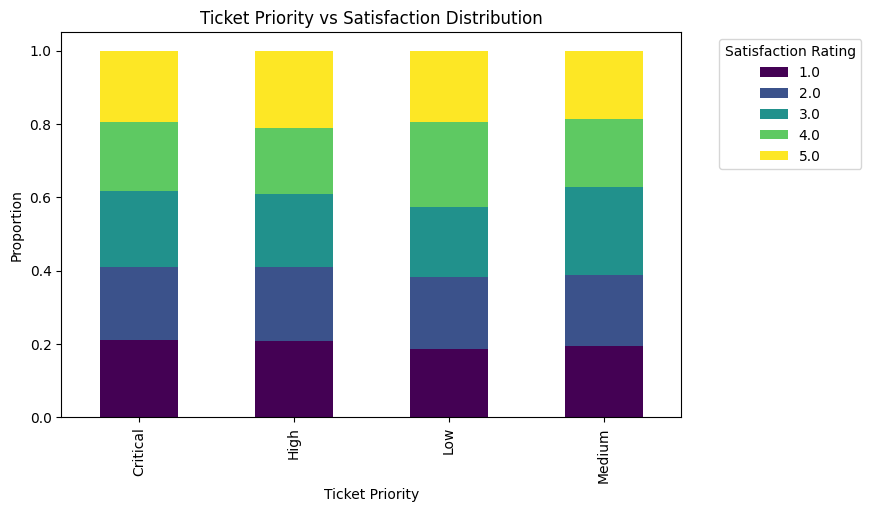

In [16]:
priority_sat = pd.crosstab(
    data['Ticket Priority'],
    data['Customer Satisfaction Rating'],
    normalize='index'
)

priority_sat.plot(
    kind='bar',
    stacked=True,
    figsize=(8,5),
    colormap='viridis'
)

plt.title("Ticket Priority vs Satisfaction Distribution")
plt.ylabel("Proportion")
plt.xlabel("Ticket Priority")
plt.legend(title="Satisfaction Rating", bbox_to_anchor=(1.05,1))
plt.show()


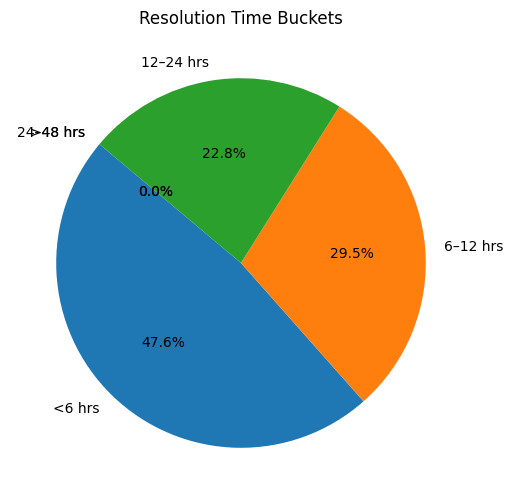

In [17]:
data['Resolution_Bucket'] = pd.cut(
    data['Resolution_Hours'],
    bins=[0,6,12,24,48,1000],
    labels=['<6 hrs','6–12 hrs','12–24 hrs','24–48 hrs','>48 hrs']
)

bucket_counts = data['Resolution_Bucket'].value_counts().sort_index()

plt.figure(figsize=(6,6))
plt.pie(
    bucket_counts,
    labels=bucket_counts.index,
    autopct='%1.1f%%',
    startangle=140
)
plt.title("Resolution Time Buckets")
plt.show()


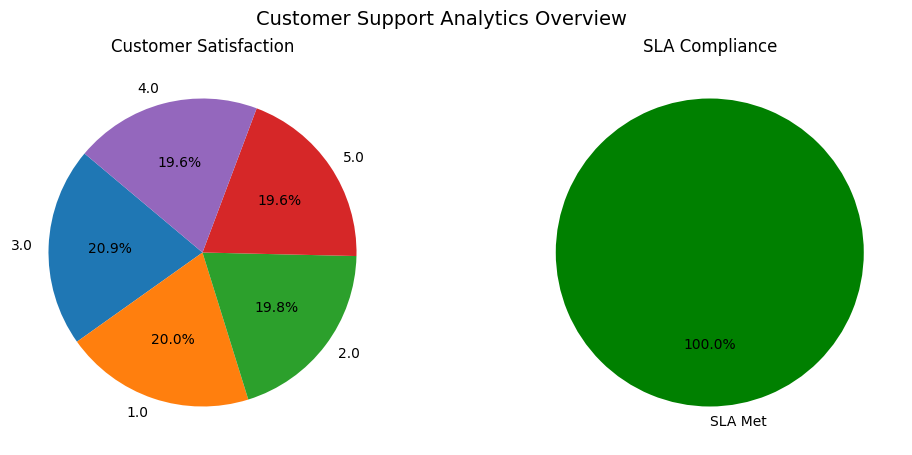

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(12,5))

# Satisfaction
axs[0].pie(
    rating_counts,
    labels=rating_counts.index,
    autopct='%1.1f%%',
    startangle=140
)
axs[0].set_title("Customer Satisfaction")

# SLA
axs[1].pie(
    sla_counts,
    labels=sla_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['green','red']
)
axs[1].set_title("SLA Compliance")

plt.suptitle("Customer Support Analytics Overview", fontsize=14)
plt.show()
